Каирова Екатерина ТФэ-01-21 
6 семестр
Домашняя работа 2

Построить графики зависимостией 
, 
, 
, для т
=0.88, к
 = 0.85, при различных значениях температуры перед газовой турбиной 
 и температурой воздуха перед компрессором 
 C. m = 0.25, 
, кс
 = 1.

 = 400, 500, 600, 700, 800, 900, 1200, 1400 C

Найти оптимум по мощности и по КПД для температуры 
 = 1200 и построить на графиках в этих точках вертикальную линию (или поставить заметную точку на соответствующей кривой) 
 =

In [11]:
import matplotlib.pyplot as plt
to_kelvin = lambda x: x + 273.15 if x else None

In [12]:
m = 0.25
T_a = 0 + 273.15
combustor_efficiency = 1
turbine_efficiency = 0.88
compressor_efficiency = 0.85
t_c = 400, 500, 600, 700, 800, 900, 1200, 1400
eps = 1.5, 3, 4.5, 6, 7.5, 9, 12, 15, 20, 30, 40, 50, 60, 70, 80
#DELTA == EPS в формуле с DELTA подставляла сразу EPS
EPS = list(eps)
T_c = map(to_kelvin,t_c)   
T_c = list(T_c)

Cp_air = 1007
Cp_gas = 1225
Cp = (Cp_air + Cp_gas) / 2

In [13]:
def wc(T_c, T_a, EPS):    
    H_t = Cp * T_c * (1 - EPS ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((EPS ** m) - 1) / compressor_efficiency
    work_coefficient = (H_t - H_k) / H_t
    return work_coefficient

work_coefficient = dict()
for Tcvalue in T_c:
    work_coefficient[Tcvalue]= []
    for epsvalue in EPS:
        work_coefficient[Tcvalue].append(wc(Tcvalue,T_a,epsvalue))

In [14]:
def ucw(T_c, T_a, EPS):    
    H_t = Cp * T_c * (1 - EPS ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((EPS ** m) - 1) / compressor_efficiency
    useful_cycle_work = (H_t - H_k)/1000
    return useful_cycle_work

useful_cycle_work = dict()
for Tcvalue in T_c:
    useful_cycle_work[Tcvalue]= []
    for epsvalue in EPS:
        useful_cycle_work[Tcvalue].append(ucw(Tcvalue,T_a,epsvalue))

In [15]:
def eff(T_c, T_a, EPS):    
    H_t = Cp * T_c * (1 - EPS ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((EPS ** m) - 1) / compressor_efficiency
    T_b = T_a + (H_k / Cp_air)
    q_comb = Cp * (T_c - T_b) * (1 / combustor_efficiency)
    efficiency = (H_t - H_k) / q_comb
    return efficiency

efficiency = dict()
for Tcvalue in T_c:
    efficiency[Tcvalue]= []
    for epsvalue in EPS:
        efficiency[Tcvalue].append(eff(Tcvalue,T_a,epsvalue))

In [16]:
r = 1.5, 3, 4.5, 6, 7.5, 9, 12, 15, 20
R = list(r)
def t(T_c, T_a, R):    
    H_t = Cp * T_c * (1 - R ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((R ** m) - 1) / compressor_efficiency
    T_b = T_a + (H_k / Cp_air)
    q_comb = Cp * (T_c - T_b) * (1 / combustor_efficiency)
    ty = (H_t - H_k) / q_comb
    return ty

ty = dict()
for Tcvalue in T_c:
    ty[Tcvalue]= []
    for rvalue in R:
        ty[Tcvalue].append(t(Tcvalue,T_a,rvalue))

In [17]:
g = 1.5, 3, 4.5, 6, 7.5, 9, 12, 15, 20, 30, 40, 51
G = list(g)
def k(T_c, T_a, G):    
    H_t = Cp * T_c * (1 - G ** (-m)) * turbine_efficiency
    H_k = Cp * T_a * ((G ** m) - 1) / compressor_efficiency
    T_b = T_a + (H_k / Cp_air)
    q_comb = Cp * (T_c - T_b) * (1 / combustor_efficiency)
    ko = (H_t - H_k) / q_comb
    return ko

ko = dict()
for Tcvalue in T_c:
    ko[Tcvalue]= []
    for gvalue in G:
        ko[Tcvalue].append(k(Tcvalue,T_a,gvalue))

In [18]:
T_1200 = 1200+273.15
stepen = 1/(2*m)
eps_opt_H = ((T_1200/T_a)*turbine_efficiency*compressor_efficiency)**stepen
max_eff_1200 = max(efficiency[T_1200])
eps_opt_eff = (((T_1200 / T_a) * turbine_efficiency * compressor_efficiency) / (1 - max_eff_1200)) ** stepen
eff_opt = eff(T_1200, T_a, eps_opt_eff)
H_opt = ucw(T_1200, T_a, eps_opt_H)

In [19]:
print('оптимальная степень сжатия по кпд ', eps_opt_eff,'и соответствующий кпд', eff_opt)
print("оптимальная степень сжатия по полезной работе", eps_opt_H,"и соответствующая полезная работа", H_opt)

оптимальная степень сжатия по кпд  55.05578033677196 и соответствующий кпд 0.45467979798949937
оптимальная степень сжатия по полезной работе 16.27401553468851 и соответствующая полезная работа 364.7586751820972


Text(0.5, 1.0, 'Коэфф. полезной работы от степени сжатия')

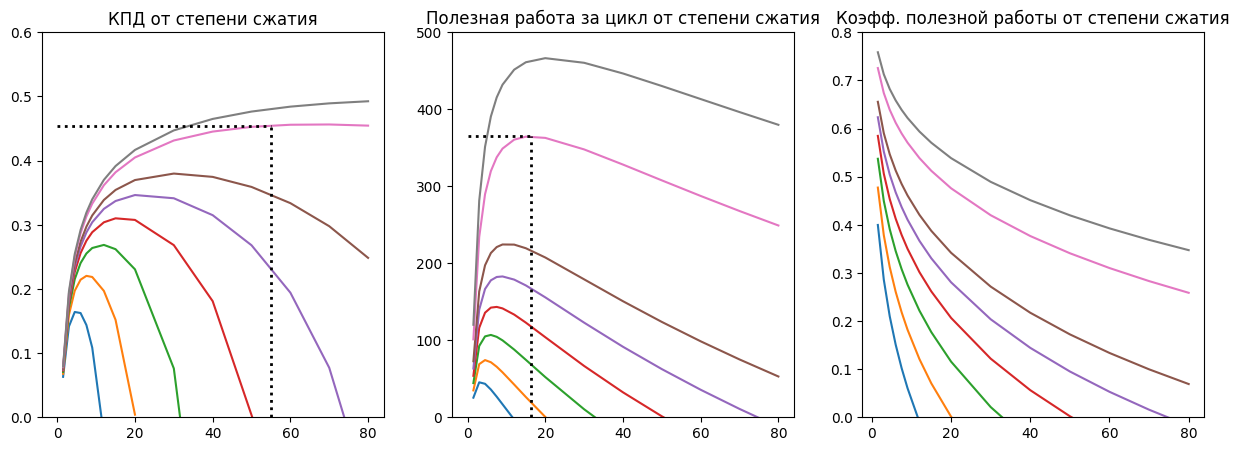

In [20]:
x = EPS
#значения степени сжатия для устранения лишних линий в графике с КПД

fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].plot(R, ty[673.15], label = '400 C')  
ax[0].plot(R, ty[773.15], label = '500 C') 

ax[0].plot(G, ko[873.15], label = '600 C')
ax[0].plot(G, ko[973.15], label = '700 C')


ax[0].plot(x, efficiency[1073.15], label = '800 C')
ax[0].plot(x, efficiency[1173.15], label = '900 C')
ax[0].plot(x, efficiency[1473.15], label = '1200 C')
ax[0].plot(x, efficiency[1673.15], label = '1400 C')

ax[0].set_ylim([0, 0.6])

ax[0].vlines(eps_opt_eff, 0, eff_opt, color = 'k', linewidth = 2, linestyle = ':')
ax[0].hlines(eff_opt, 0, eps_opt_eff, color = 'k', linewidth = 2, linestyle = ':') 


ax[0].set_title('КПД от степени сжатия')

ax[1].plot(x, useful_cycle_work[673.15], label = '400 C')  
ax[1].plot(x, useful_cycle_work[773.15], label = '500 C')  
ax[1].plot(x, useful_cycle_work[873.15], label = '600 C')
ax[1].plot(x, useful_cycle_work[973.15], label = '700 C')
ax[1].plot(x, useful_cycle_work[1073.15], label = '800 C')
ax[1].plot(x, useful_cycle_work[1173.15], label = '900 C')
ax[1].plot(x, useful_cycle_work[1473.15], label = '1200 C')
ax[1].plot(x, useful_cycle_work[1673.15], label = '1400 C')

ax[1].vlines(eps_opt_H, 0, H_opt, color = 'k', linewidth = 2, linestyle = ':')
ax[1].hlines(H_opt, 0, eps_opt_H, color = 'k', linewidth = 2, linestyle = ':') 
ax[1].set_ylim([0, 500])
ax[1].set_title('Полезная работа за цикл от степени сжатия')

ax[2].plot(x, work_coefficient[673.15], label = '400 C')  
ax[2].plot(x, work_coefficient[773.15], label = '500 C')  
ax[2].plot(x, work_coefficient[873.15], label = '600 C')
ax[2].plot(x, work_coefficient[973.15], label = '700 C')
ax[2].plot(x, work_coefficient[1073.15], label = '800 C')
ax[2].plot(x, work_coefficient[1173.15], label = '900 C')
ax[2].plot(x, work_coefficient[1473.15], label = '1200 C')
ax[2].plot(x, work_coefficient[1673.15], label = '1400 C')

ax[2].set_ylim([0, 0.8])
ax[2].set_title('Коэфф. полезной работы от степени сжатия')
